In [1]:
import numpy as np
import imageio as iio
from IPython.display import Image

In [12]:
# various cost functions
def cost_function1(picture):
    # same color attract in Moore neighbourhood
    N = picture.shape[0]
    cost: int = 0
    # up-down
    neighbours = picture[:(N-1), :] == picture[1:, :]
    cost = (N ** 2 - np.sum(neighbours))
    
    # left-right
    neighbours = picture[:, :(N-1)] == picture[:, 1:]
    cost = (N ** 2 - np.sum(neighbours))
    
    # diagonals
    neighbours = picture[:(N-1), :(N-1)] == picture[1:, 1:]
    cost = (N ** 2 - np.sum(neighbours))
    
    neighbours = picture[:(N-1), 1:] == picture[1:, :(N-1)]
    cost = (N ** 2 - np.sum(neighbours))

    cost = cost * 0.1 # to scale it a little bit
    return cost

def cost_function2(picture):
    # form vertical lines
    N = picture.shape[0]
    cost: int = 0
    
    # horizontal neighbours increase cost
    neighbours = picture[:, :(N-1)] == picture[:, 1:]
    cost += np.sum(neighbours)
    

    cost = cost * 0.1 # to scale it a little bit
    return cost

def cost_function3(picture):
    # form horizontal lines
    N = picture.shape[0]
    cost: int = 0
    
    # vertical neighbours increase cost
#     neighbours = picture[:(N-1), :] == picture[1:, :]
#     cost += np.sum(neighbours)
    cost = np.random.randint(10, 200, 1)[0]

    cost = cost * 0.1 # to scale it a little bit
    return cost

In [13]:
# temperature function
def temp_function(k, steps):
    return 1/np.exp(k/steps)

# probability that we take solution even if it is worse
def acceptance_function(T, energy_difference):
    if energy_difference < 0:
        return 1 # always go down a gradient if found a way
    return 1/(1 + np.exp(energy_difference/T))

In [14]:
def swap_picture(picture, swap_positions = None):
    N = picture.shape[0]
    # if positions is None we will generate them randomly
    if swap_positions == None:
        temp = np.random.randint(0, N, 4)
        swap_positions = np.array([[temp[0], temp[1]], [temp[2], temp[3]]])
            

    picture[swap_positions[0]], picture[swap_positions[1]] = picture[swap_positions[1]], picture[swap_positions[0]]
    
    return swap_positions[0], swap_positions[1]

In [15]:
# main function
def annealing(picture, cost_function_arg, max_steps = 10000):
    T: float = -1
    current_energy: float = cost_function_arg(picture)
    next_energy: float = -1
    best_energy: float = current_energy
    best_picture = picture
    for k in range(max_steps):
        T = temp_function(k, max_steps)
        swap_positions: Tuple[int, int] = swap_picture(picture)
        next_energy = cost_function_arg(picture)

        # if new state not accepted swap back
        if not (acceptance_function(T, next_energy - current_energy) > np.random.uniform(0, 1)):
            swap_picture(picture, swap_positions)
            # current energy stays the same
        else:
            current_energy = next_energy

        if best_energy > current_energy:
            best_energy = current_energy
            best_picture = picture

        if k % 1000 == 0:
            print(f'k: {k} energy: {best_energy}')
            
    picture = best_picture
    return picture

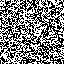

In [16]:
# experminets
N = 64
raw_picture = np.random.choice([0, 255], N**2).reshape(N, N)
raw_picture = raw_picture.astype(np.uint8)
iio.imwrite('data/lab4/init_grid.gif', raw_picture)  
Image(filename='data/lab4/init_grid.gif') 

k: 0 energy: 211.70000000000002
k: 1000 energy: 196.70000000000002
k: 2000 energy: 196.70000000000002
k: 3000 energy: 196.70000000000002
k: 4000 energy: 196.70000000000002
k: 5000 energy: 196.70000000000002
k: 6000 energy: 196.70000000000002
k: 7000 energy: 196.70000000000002
k: 8000 energy: 196.70000000000002
k: 9000 energy: 196.70000000000002
k: 10000 energy: 196.70000000000002
k: 11000 energy: 196.70000000000002
k: 12000 energy: 196.70000000000002
k: 13000 energy: 196.70000000000002
k: 14000 energy: 196.70000000000002
k: 15000 energy: 196.70000000000002
k: 16000 energy: 196.70000000000002
k: 17000 energy: 196.70000000000002
k: 18000 energy: 196.70000000000002
k: 19000 energy: 196.70000000000002


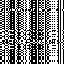

In [17]:
result_pic = annealing(np.copy(raw_picture), cost_function1, max_steps=20000)
iio.imwrite('data/lab4/ann1.gif', result_pic)  
Image(filename='data/lab4/ann1.gif') 

k: 0 energy: 202.3
k: 1000 energy: 196.0
k: 2000 energy: 183.10000000000002
k: 3000 energy: 177.5
k: 4000 energy: 174.0
k: 5000 energy: 171.8
k: 6000 energy: 168.20000000000002
k: 7000 energy: 166.60000000000002
k: 8000 energy: 163.60000000000002
k: 9000 energy: 163.60000000000002
k: 10000 energy: 161.60000000000002
k: 11000 energy: 161.4
k: 12000 energy: 161.4
k: 13000 energy: 161.4
k: 14000 energy: 161.4
k: 15000 energy: 160.8
k: 16000 energy: 156.5
k: 17000 energy: 153.60000000000002
k: 18000 energy: 153.60000000000002
k: 19000 energy: 153.60000000000002
k: 20000 energy: 153.60000000000002
k: 21000 energy: 153.60000000000002
k: 22000 energy: 153.60000000000002
k: 23000 energy: 153.60000000000002
k: 24000 energy: 153.60000000000002
k: 25000 energy: 153.60000000000002
k: 26000 energy: 153.60000000000002
k: 27000 energy: 153.60000000000002
k: 28000 energy: 153.60000000000002
k: 29000 energy: 153.60000000000002
k: 30000 energy: 153.60000000000002
k: 31000 energy: 153.60000000000002
k: 3

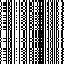

In [18]:
result_pic = annealing(np.copy(raw_picture), cost_function2, max_steps=40000)
iio.imwrite('data/lab4/ann2.gif', result_pic)  
Image(filename='data/lab4/ann2.gif') 

k: 0 energy: 12.3
k: 1000 energy: 1.0
k: 2000 energy: 1.0
k: 3000 energy: 1.0
k: 4000 energy: 1.0
k: 5000 energy: 1.0
k: 6000 energy: 1.0
k: 7000 energy: 1.0
k: 8000 energy: 1.0
k: 9000 energy: 1.0
k: 10000 energy: 1.0
k: 11000 energy: 1.0
k: 12000 energy: 1.0
k: 13000 energy: 1.0
k: 14000 energy: 1.0
k: 15000 energy: 1.0
k: 16000 energy: 1.0
k: 17000 energy: 1.0
k: 18000 energy: 1.0
k: 19000 energy: 1.0
k: 20000 energy: 1.0
k: 21000 energy: 1.0
k: 22000 energy: 1.0
k: 23000 energy: 1.0
k: 24000 energy: 1.0
k: 25000 energy: 1.0
k: 26000 energy: 1.0
k: 27000 energy: 1.0
k: 28000 energy: 1.0
k: 29000 energy: 1.0
k: 30000 energy: 1.0
k: 31000 energy: 1.0
k: 32000 energy: 1.0
k: 33000 energy: 1.0
k: 34000 energy: 1.0
k: 35000 energy: 1.0
k: 36000 energy: 1.0
k: 37000 energy: 1.0
k: 38000 energy: 1.0
k: 39000 energy: 1.0


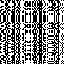

In [19]:
result_pic = annealing(np.copy(raw_picture), cost_function3, max_steps=40000)
iio.imwrite('data/lab4/ann3.gif', result_pic)  
Image(filename='data/lab4/ann3.gif') 

**Wnioski**: da sie zaobserwować ustawianie się pixeli w linie pionowe i poziome. Linie pionowe działają dużo gorzej, ale prawdopodobnie wynika to z mojego błędu w kodzie